# Business understanding.

As a data scientist, my primary focus is on leveraging data-driven insights and statistical analysis to provide valuable solutions and recommendations. In this capacity, SyriaTel, the leading mobile operator in Syria, becomes a key stakeholder in my project. SyriaTel's extensive operations, serving over 13 million customers with a broad spectrum of mobile services and a vast network infrastructure, present an opportunity for me to analyze and extract actionable information from their data.
The goal is to collaborate with SyriaTel to uncover valuable patterns and trends in their customer data, with a specific focus on addressing customer churn and enhancing the overall customer experience. By working closely with SyriaTel, I aim to assist the company in optimizing its strategies for customer retention, improving service offerings, and ultimately contributing to the company's continued success in the dynamic telecommunications industry.

## Problem Statement:
To minimize customer churn and the associated financial losses, I aim to develop a predictive binary classification model. This model will assess customer behavior and characteristics to determine the likelihood of a customer leaving SyriaTel shortly. By identifying patterns that precede customer attrition, I can enable SyriaTel to take proactive measures, such as targeted retention strategies, to retain valuable customers. This project is essential for the telecom business to enhance customer satisfaction and reduce revenue erosion.

## Success Metric

The most suitable success metric would be Precision.
Precision measures the proportion of true positive predictions (correctly identified customers at risk of churn) out of all positive predictions (customers predicted to be at risk of churn). In this context, a high precision score indicates that the model is effective at correctly identifying customers who are genuinely at risk of churning, which is essential for minimizing unnecessary retention efforts.
By optimizing for precision, you ensure that the company's resources are focused on customers who are most likely to churn, reducing the cost of retention initiatives while still retaining valuable customers. This aligns with the company's goal of cost reduction while addressing customer churn.!

# Data Understanding.


### Load the dataset

In [1]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  BaggingClassifier, RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

In [2]:
# load dataset
customer_df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# print the first 5 rows
customer_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Data Cleaning

### Check the data

In [3]:
print(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

There are no missing values to the data. Though somm of the columns have incorrect data types. These columns are; Area code

In [4]:
# Change the datatype of area code column to object
customer_df['area code'] = customer_df['area code'].astype(object)


In [5]:
# Drop the unnecessary columns
customer_df = customer_df.drop(['phone number', 'account length'], axis=1)

In [6]:
# check for duplicates using the phone number
customer_df.duplicated().value_counts()

False    3333
dtype: int64

Ths dataframe has no duplicates and no missing values.

# Exploratory Data Analysis

## Univarient Analysis

Churn is the target variable for this classification project.

In [7]:
# unique values of the target variable
customer_df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

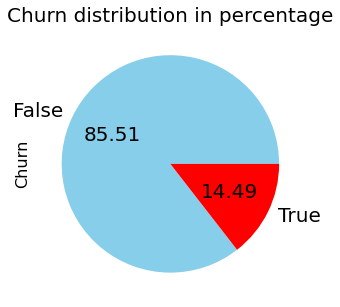

In [8]:
# pie chart showing distribution of target variable
fig, ax = plt.subplots(figsize=(10, 5))

customer_df.groupby('churn').size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, colors=['skyblue', 'red'], ax=ax)
ax.set_ylabel('Churn', fontsize=16)
ax.set_title('Churn distribution in percentage', fontsize=20);

There is a class imbalance problem since the target class has an uneven distribution of observations. 85.51% of the data belongs to the False class while 14.49% belongs to the true class.

In [9]:
# describe the data
customer_df.describe()

,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


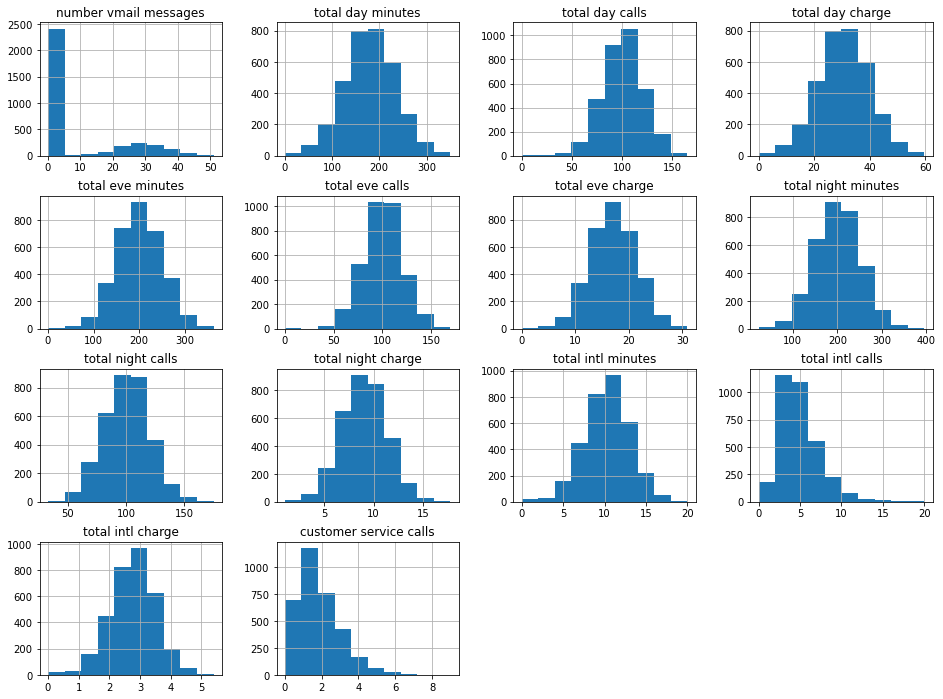

In [10]:
# distribution of features
customer_df.drop(columns='churn').hist(figsize=(16,12));

The scaling differs across the features, and a few of the features are not normally distributed.  The features will therefore have to be scaled and normalized.

### Categorical variables.

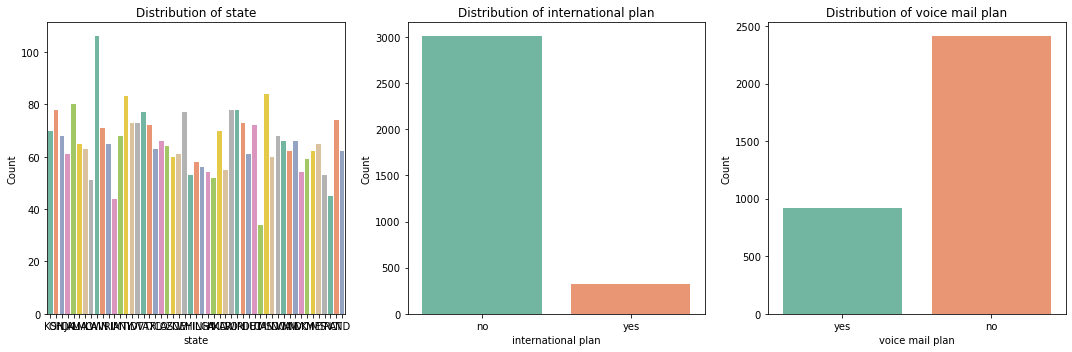

In [11]:
import seaborn as sns

# Select the categorical variables you want to analyze
categorical_columns = ['state', 'international plan', 'voice mail plan']

# Set the figure size
plt.figure(figsize=(15, 5))

# Loop through the selected categorical columns and create count plots
for i, column in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i + 1)
    
    # Create a count plot
    sns.countplot(data=customer_df, x=column, palette='Set2')
    
    # Set labels and title
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


## Multivarient Analysis

### Relationship between features and churn

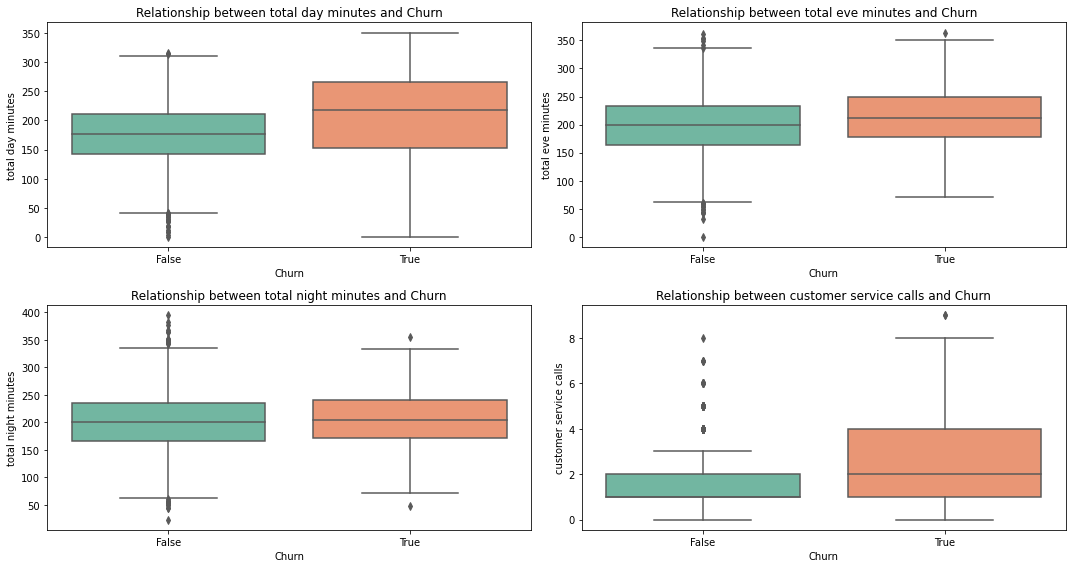

In [12]:
# Select features of interest (numeric or categorical) that you want to analyze
features_of_interest = ['total day minutes', 'total eve minutes', 'total night minutes', 'customer service calls']

# Set the figure size
plt.figure(figsize=(15, 8))

# Loop through the selected features and create box plots or histograms
for i, feature in enumerate(features_of_interest):
    plt.subplot(2, 2, i + 1)
    
    # Create a box plot for numeric features or a count plot for categorical features
    if customer_df[feature].dtype == 'object':
        sns.countplot(data=customer_df, x=feature, hue='churn', palette='Set2')
    else:
        sns.boxplot(data=customer_df, x='churn', y=feature, palette='Set2')
    
    # Set labels and title
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.title(f'Relationship between {feature} and Churn')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


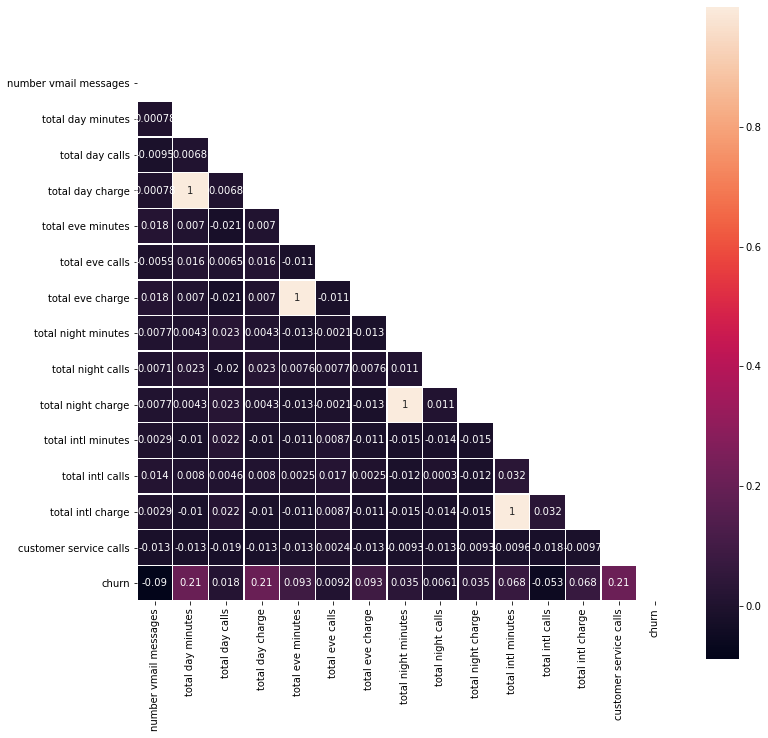

In [13]:
#using a heatmap to show correlation
fig, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(customer_df.corr(), dtype=bool))
sns.heatmap(customer_df.corr(), linewidths=0.5, mask=mask, square=True, ax=ax, annot=True);

- There is a very low correlation between most features. <br>
- However, there is a perfect positive correlation between total evening charge and total evening minutes, total day charge and total day minutes, total night charge and total night minutes, and total international charge and total international minutes. This is expected since the charge of a call depends on the length of the call in minutes. One correlated variable will have to be dropped from each pair to handle multicollinearity. <br>
- total day minutes, total day charge and customer service calls have a weak positive correlation with churn. <br>
- The other features have a negligible correlation with churn, approximately 0.

# Customer Service Calls Analysis.

## Visualize the relationship.

here I will create a boxplot to visualize the relationship between the umber of customer service calls and churn.

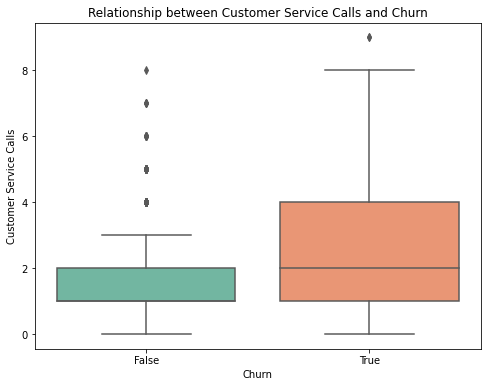

In [14]:
# Create a box plot to compare customer service calls for churned and non-churned customers
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_df, x='churn', y='customer service calls', palette='Set2')
plt.title('Relationship between Customer Service Calls and Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

### calculate summary statistics.
I will calculte summary statistics 

In [15]:
# Summary statistics for customer service calls for churned customers
churned_calls = customer_df[customer_df['churn'] == True]['customer service calls']
mean_churned = churned_calls.mean()
median_churned = churned_calls.median()
std_churned = churned_calls.std()

# Summary statistics for customer service calls for non-churned customers
non_churned_calls = customer_df[customer_df['churn'] == False]['customer service calls']
mean_non_churned = non_churned_calls.mean()
median_non_churned = non_churned_calls.median()
std_non_churned = non_churned_calls.std()

print("Churned Customer Service Calls - Mean: {:.2f}, Median: {:.2f}, Std Dev: {:.2f}".format(mean_churned, median_churned, std_churned))
print("Non-Churned Customer Service Calls - Mean: {:.2f}, Median: {:.2f}, Std Dev: {:.2f}".format(mean_non_churned, median_non_churned, std_non_churned))


Churned Customer Service Calls - Mean: 2.23, Median: 2.00, Std Dev: 1.85
Non-Churned Customer Service Calls - Mean: 1.45, Median: 1.00, Std Dev: 1.16


### Calculate the correlation.
Here we get to know the correlation between the number of customer service calls and churn.
i will use a poit-biseral correlation coefficient  since churn is a binary variable while the customer service calls is a continuous variable.

In [16]:
from scipy import stats

# Calculate point-biserial correlation between 'customer service calls' and 'churn'
correlation, p_value = stats.pointbiserialr(customer_df['customer service calls'], customer_df['churn'])

# Print the correlation coefficient
print("Point-Biserial Correlation: {:.2f}".format(correlation))

# Determine if the correlation is statistically significant
alpha = 0.05  # Set your significance level (e.g., 0.05)
if p_value < alpha:
    print("The correlation is statistically significant (p-value < {:.2f}).".format(alpha))
else:
    print("The correlation is not statistically significant (p-value >= {:.2f}).".format(alpha))


Point-Biserial Correlation: 0.21
The correlation is statistically significant (p-value < 0.05).


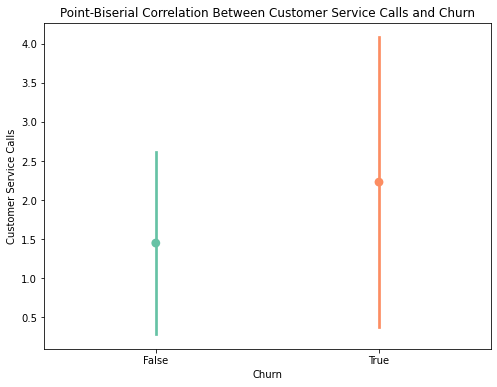

In [17]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a point-biserial correlation plot
sns.pointplot(data=customer_df, x='churn', y='customer service calls', ci='sd', palette='Set2')
plt.title('Point-Biserial Correlation Between Customer Service Calls and Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

This means that as the number of customer service calls increases, the likelihood of churn also increases.

# Day and Night Calls Analysis.

I would like to know what difference does the time of calls affect the churn of the customers.

I will work it in a few segments; 

    -Between Day and Night time users which were inclined to stop using the service.
    -Did the costs of the calls in the different times encourage the churn.
    

## Correation of churn with the time of day users.

### First group the data into day and night users.

In [18]:
# import sqlite3
import sqlite3

# Create a new column 'time_of_day' based on minutes
customer_df['time_of_day'] = customer_df.apply(lambda row: 'Day' if row['total day minutes'] > row['total night minutes'] else 'Night', axis=1)

# Connect to a SQLite database
conn = sqlite3.connect('user_data.db')

# Store the DataFrame in the SQLite database
customer_df.to_sql('user_data', conn, if_exists='replace', index=False)

# Use SQL to group the users by 'time_of_day'
query = """
SELECT time_of_day, COUNT(*) as user_count
FROM user_data
GROUP BY time_of_day
"""

# Execute the SQL query and fetch the results
results = conn.execute(query).fetchall()

# Close the database connection
conn.close()

# Print the results
for result in results:
    print(f"Time of Day: {result[0]}, User Count: {result[1]}")

Time of Day: Day, User Count: 1280
Time of Day: Night, User Count: 2053


C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


### Get the correlation between churn and time of day.

In [19]:
# Convert 'churn' to binary values (1 for True, 0 for False)
customer_df['churn'] = customer_df['churn'].astype(int)

# Calculate point-biserial correlation between 'time_of_day' and 'churn'
correlation, p_value = stats.pointbiserialr(customer_df['time_of_day'].map({'Day': 1, 'Night': 0}), customer_df['churn'])

# Print the correlation coefficient
print("Point-Biserial Correlation: {:.2f}".format(correlation))

# Determine if the correlation is statistically significant
alpha = 0.05  # Set your significance level (e.g., 0.05)
if p_value < alpha:
    print("The correlation is statistically significant (p-value < {:.2f}).".format(alpha))
else:
    print("The correlation is not statistically significant (p-value >= {:.2f}).".format(alpha))

Point-Biserial Correlation: 0.12
The correlation is statistically significant (p-value < 0.05).


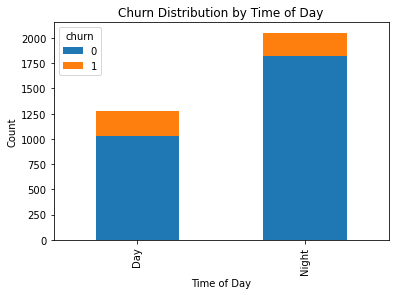

In [20]:
# Create a grouped bar chart
churn_counts = customer_df.groupby(['time_of_day', 'churn']).size().unstack()
churn_counts.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.title('Churn Distribution by Time of Day')

# Show the chart
plt.show()

The correlation does not give a conclusive so I will further do comparitive analysis of the call costs for customers who churned and those who didn't. This will be accomplished using statistical tests and visualization.

I will create two subsets one for customers who churned and the other for others who didn't. I will then perform a t-test to determine if there's a significant difference in the costs of calls during day and night of these two groups.


In [21]:
# create two subsets 
churned = customer_df[customer_df['churn'] == True]
not_churned = customer_df[customer_df['churn'] == False]

# perform a t-test for the day users
t_stat, p_value = stats.ttest_ind(churned['total day charge'], not_churned['total day charge'])

if p_value < 0.05:
    print("There is a significant difference in day call costs between churned and not churned customers.")
else:
    print("There is no significant difference in day call costs between churned and not churned customers.")
    
print()    
# perform a t-test for the night users
t_stat, p_value = stats.ttest_ind(churned['total night charge'], not_churned['total night charge'])

if p_value < 0.05:
    print("There is a significant difference in night call costs between churned and not churned customers.")
else:
    print("There is no significant difference in night call costs between churned and not churned customers.")
 

There is a significant difference in day call costs between churned and not churned customers.

There is a significant difference in night call costs between churned and not churned customers.


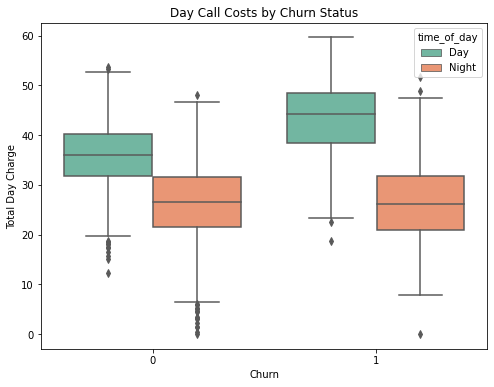

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_df, x='churn', y='total day charge', hue='time_of_day', palette='Set2')
plt.title('Day Call Costs by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Day Charge')
plt.show()

The box plot shows the average call costs for churned and non-churned customers during the day and night. We can see that churned customers have higher call costs than non-churned customers in both periods, but the difference is more pronounced during the night. This suggests that high call costs during the night may be a factor that influences customer churn.

 # International Plan Analysis.
 Here I will answer the following questions.
   - How does having an international plan relate to churn?
   - Are customers with international plans more or less likely to churn?
   
 I will follow the following steps;
   - Compute churn rates for customers with and without international plans.
   - Use chi-squared test to determine if there's a statisticallysignificant difference in churn rates between customers with and without international plans.
           - My null hypothesis would be; there's no association between having an international plan and churn,and the alternative hypothesis would be that there is an association.
   - I will then create a visualization to represent the churn rates for these group of customers. 

There is a statistically significant association between having an international plan and churn.


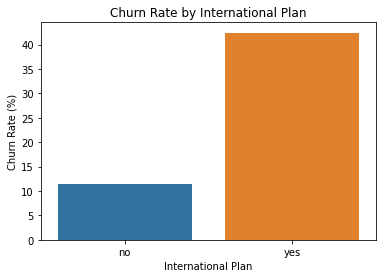

In [23]:
# Calculate churn rates
churn_rates = customer_df.groupby('international plan')['churn'].mean() * 100

# Perform a chi-squared test
contingency_table = pd.crosstab(customer_df['international plan'], customer_df['churn'])
chi2, p, _, _ = chi2_contingency(contingency_table)

# Visualize churn rates
sns.barplot(x=churn_rates.index, y=churn_rates.values)
plt.xlabel('International Plan')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by International Plan')

# Print the chi-squared test result
if p < 0.05:
    print("There is a statistically significant association between having an international plan and churn.")
else:
    print("There is no statistically significant association between having an international plan and churn.")

plt.show()


The bar gragh shows the subscribers to an international plan and those who did not compared to the churn rate. The international plan subscribers have a higher churn rate than the non- subscribers. 

# Data Preparation for Machine Learning

## Multicollinearity of features


In [24]:
# pairs with collinearity > 0.75
df = customer_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc>.75) & (df.cc<1)]

,cc
pairs,
"(total day charge, total day minutes)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night minutes, total night charge)",0.999999
"(total intl minutes, total intl charge)",0.999993


In [25]:
# drop some columns to address the collinearity
customer_df = customer_df.drop(columns = ['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])
customer_df.columns

Index(['state', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total eve minutes', 'total eve calls', 'total night minutes',
       'total night calls', 'total intl minutes', 'total intl calls',
       'customer service calls', 'churn', 'time_of_day'],
      dtype='object')

## Train-test-split

In [26]:
#select predictor and target variables
y = customer_df['churn']
X = customer_df.drop(columns=['churn'])

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

## Transform Categorical Variables

In [27]:
# Creating dummy variables for the categorical columns
X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train.head(3)

,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,...,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes,time_of_day_Night
1066,25,216.0,140,224.1,69,267.9,112,11.8,4,0,...,0,0,0,0,0,0,1,0,1,1
1553,0,217.8,93,214.7,95,228.7,70,11.3,7,0,...,0,0,0,0,0,1,0,0,0,1
2628,0,221.0,126,204.5,110,118.0,98,6.8,3,4,...,0,0,0,0,0,1,0,0,0,0


## SMOTE

By using SMOTE I will handle the class imbalance problems by oversampling the minority class with replacement.

In [28]:
# Fit SMOTE to training data
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print(pd.Series(y_train_resampled).value_counts()) 

1    2127
0    2127
Name: churn, dtype: int64


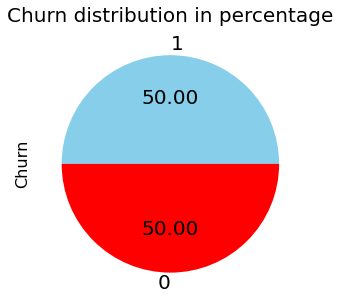

In [29]:
# pie chart showing distribution of target variable
fig, ax = plt.subplots(figsize=(10, 5))

y_train_resampled.value_counts().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20}, colors=['skyblue', 'red'], ax=ax)
ax.set_ylabel('Churn', fontsize=16)
ax.set_title('Churn distribution in percentage', fontsize=20);

In [30]:
# SMOTE not applied to test data
y_test.value_counts()

0    723
1    111
Name: churn, dtype: int64

The distribution of the churn classes is now balanced.

I applied SMOTE to the training sets only to ensure that an accurate gauge can be made on the model's performance.

# Modelling.

## Logistic Regression

This will involve conducting a predictive modelling analysis. I will do a logistic regression to identify which features or variables have the most significant impact on churn.

In [31]:
# create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# Model Evaluation
# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       723
           1       0.43      0.08      0.14       111

    accuracy                           0.86       834
   macro avg       0.65      0.53      0.53       834
weighted avg       0.82      0.86      0.82       834



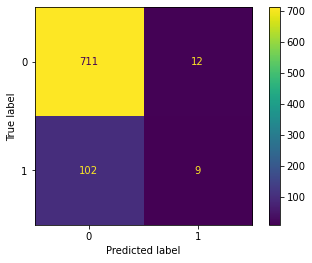

In [33]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

In [34]:
# Feature Importance
# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

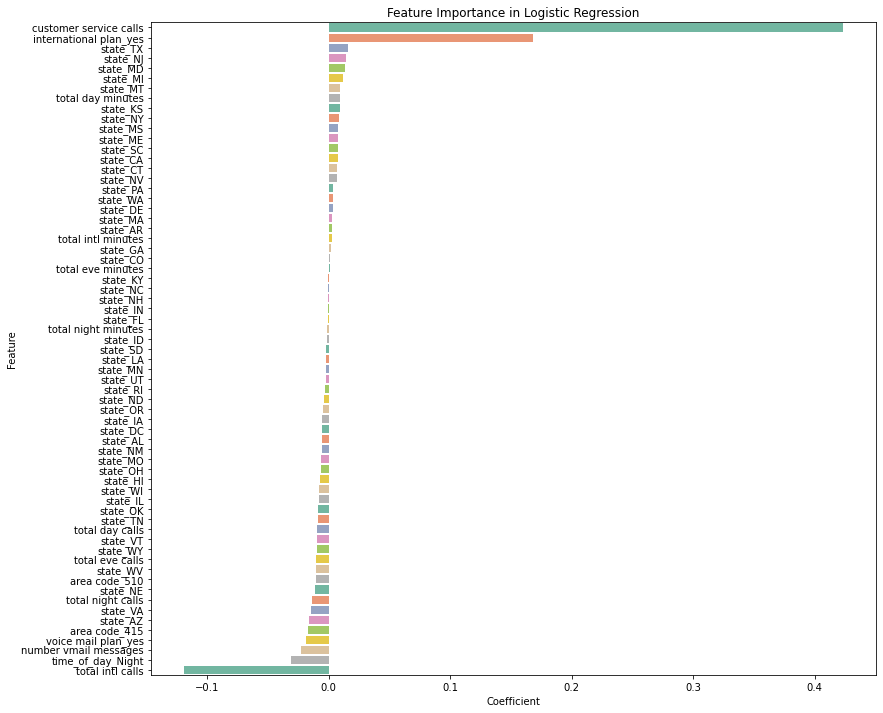

In [35]:
# Step 7: Visualization
# Create a bar plot to visualize feature importance
plt.figure(figsize=(13, 12))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='Set2')
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

The model is quite good at predicting non-churn cases (class "0") as indicated by high precision, recall, and F1-score.

However, the model performs poorly in predicting churn cases (class "1") due to low precision, recall, and F1-score.

The accuracy of 86% may be misleading, as it is influenced by the imbalance between churn and non-churn cases.

The logistic regression model is better at identifying non-churn cases but struggles with churn prediction. Depending on the goals of the business, I will need to address this imbalance. 

Inorder to address this I will have to address the model's threshold.

##  feature selection

In [36]:
# We have our logistic regression model 'model' and test data 'X_test'
y_probabilities = model.predict_proba(X_test)
y_probabilities

array([[0.74612606, 0.25387394],
       [0.90227711, 0.09772289],
       [0.94729411, 0.05270589],
       ...,
       [0.86122975, 0.13877025],
       [0.89570709, 0.10429291],
       [0.60976353, 0.39023647]])

In [57]:
threshold = 0.7

# Use the chosen threshold to make binary predictions
y_pred_adjusted = (y_probabilities[:, 1] >= threshold).astype(int)


In [58]:
# Evaluate the model with the adjusted threshhold
from sklearn.metrics import classification_report

print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))


Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       723
           1       1.00      0.03      0.05       111

    accuracy                           0.87       834
   macro avg       0.94      0.51      0.49       834
weighted avg       0.89      0.87      0.81       834



# Using Different Techniques.

# Build a Decision Tree Model.

In [39]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

## Feature importance

Here we will quickly check how important each feature ended up being in our decision tree model.

In [40]:
# Feature importance
feature_importances = tree_clf.feature_importances_
feature_importances

array([0.05763904, 0.3685105 , 0.        , 0.13503228, 0.        ,
       0.01653218, 0.        , 0.10007555, 0.08575697, 0.14258975,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0086281 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08523561, 0.        , 0.        ])

Running a visualization of this matrix should help us see the feature importances for this model

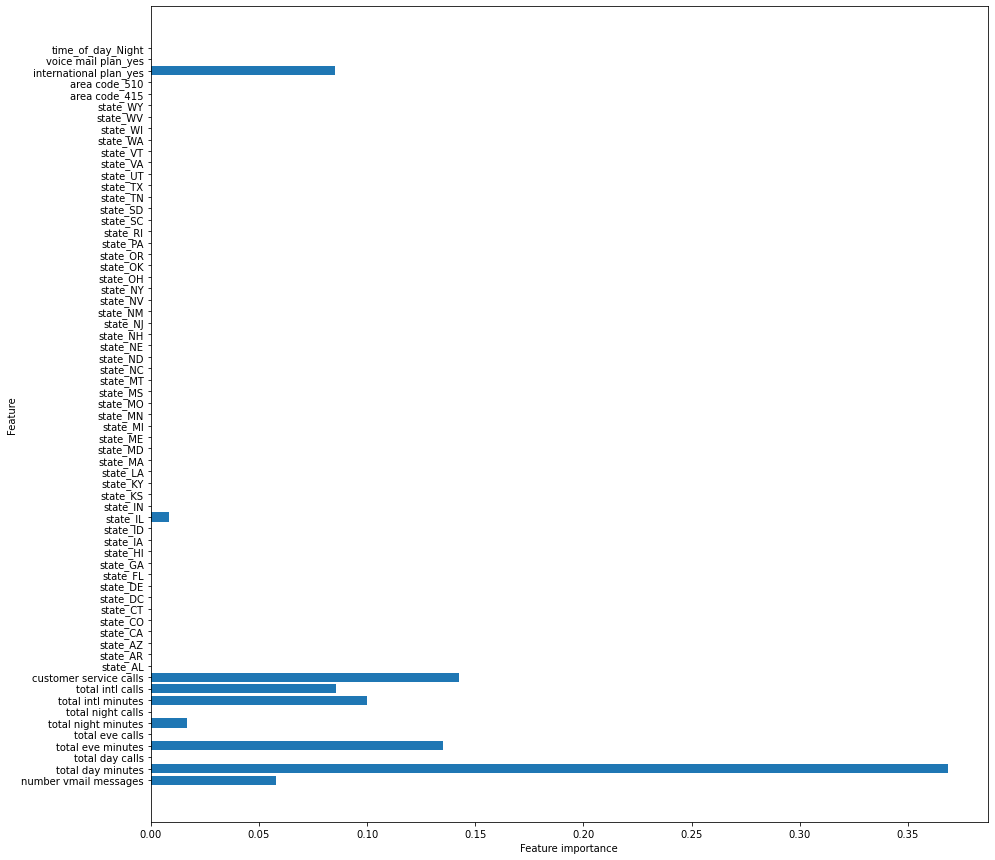

In [41]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

The visualization shows that the 'total day minutes' has more importance followed by customer service calls, international plan, and total night calls.

## Model performance

I will now go ahead and se how the model performed on the test data.

In [42]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix
confusion = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", confusion)
print()
# Classification report
report = classification_report(y_test, pred)
print("Classification Report:\n", report)

Confusion Matrix:
 [[705  18]
 [ 31  80]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       723
           1       0.82      0.72      0.77       111

    accuracy                           0.94       834
   macro avg       0.89      0.85      0.87       834
weighted avg       0.94      0.94      0.94       834



I will now check the model's accuracy.

In [43]:
# check the model's accuracy
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 94.12%


## Bagged trees

In [44]:
# Instantiate a DecisionTreeClassifier
base_tree = DecisionTreeClassifier(criterion='gini', max_depth=5)

# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(base_tree, n_estimators=20, random_state=123)

In [45]:
# Fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20, random_state=123)

In [46]:
# Training accuracy score
training_accuracy = bagged_tree.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")

Training Accuracy: 95.76%


In [47]:
# Test accuracy score
testing_accuracy = bagged_tree.score(X_test, y_test)
print(f"Testing Accuracy: {testing_accuracy * 100:.2f}%")

Testing Accuracy: 94.48%


In [59]:
# Test set predictions
pred = bagged_tree.predict(X_test)

# Confusion matrix
confusion = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", confusion)
print()
# Classification report
report = classification_report(y_test, pred)
print("Classification Report:\n", report)

Confusion Matrix:
 [[707  16]
 [ 30  81]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       723
           1       0.84      0.73      0.78       111

    accuracy                           0.94       834
   macro avg       0.90      0.85      0.87       834
weighted avg       0.94      0.94      0.94       834



# Random forests

In [48]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=123)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=123)

### Checking for the accuracy score

In [49]:
# Training accuracy score
training_accuracy = forest.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")

Training Accuracy: 86.27%


In [50]:
# Test accuracy score
testing_accuracy = forest.score(X_test, y_test)
print(f"Testing Accuracy: {testing_accuracy * 100:.2f}%")

Testing Accuracy: 86.81%


In [60]:
# Test set predictions
pred = forest.predict(X_test)

# Confusion matrix
confusion = confusion_matrix(y_test, pred)
print("Confusion Matrix:\n", confusion)
print()
# Classification report
report = classification_report(y_test, pred)
print("Classification Report:\n", report)

Confusion Matrix:
 [[723   0]
 [110   1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       723
           1       1.00      0.01      0.02       111

    accuracy                           0.87       834
   macro avg       0.93      0.50      0.47       834
weighted avg       0.89      0.87      0.81       834



### Feature importance

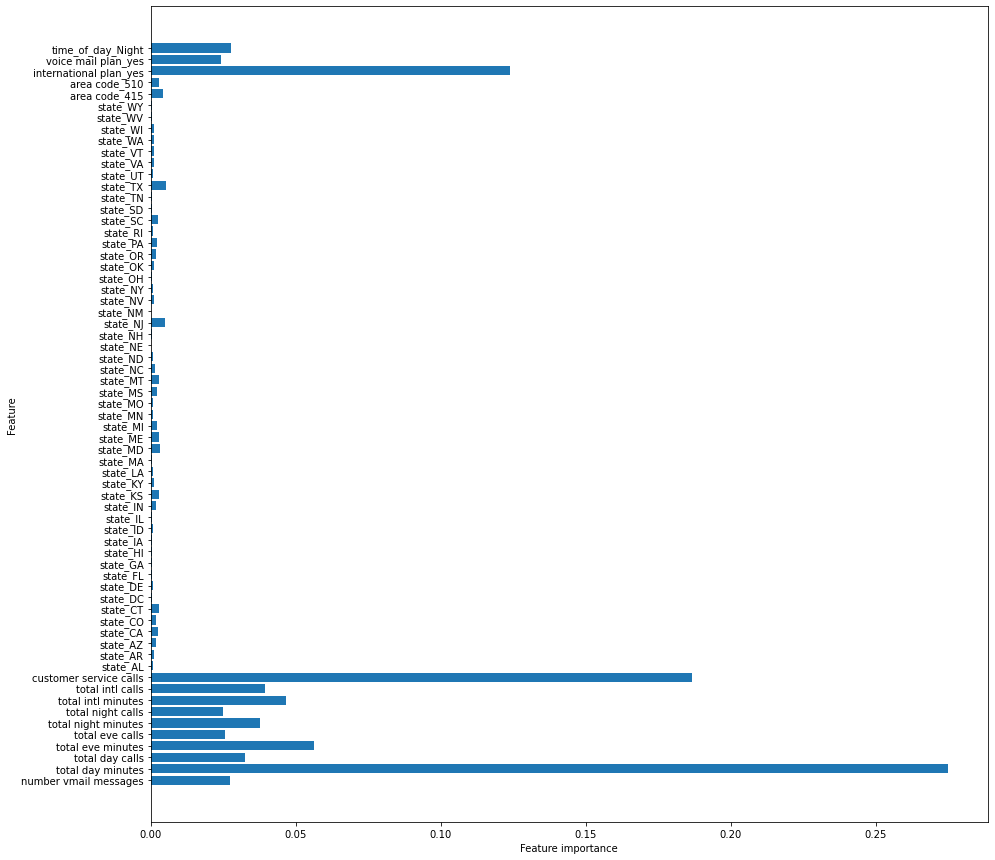

In [51]:
plot_feature_importances(forest)

Here I create a forest with some small trees

In [52]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators=5, max_features=10, max_depth=2, random_state=123)
forest_2.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=10, n_estimators=5,
                       random_state=123)

I will then get the first tree from forest_2.estimators_ and store it in rf_tree_1

In [53]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

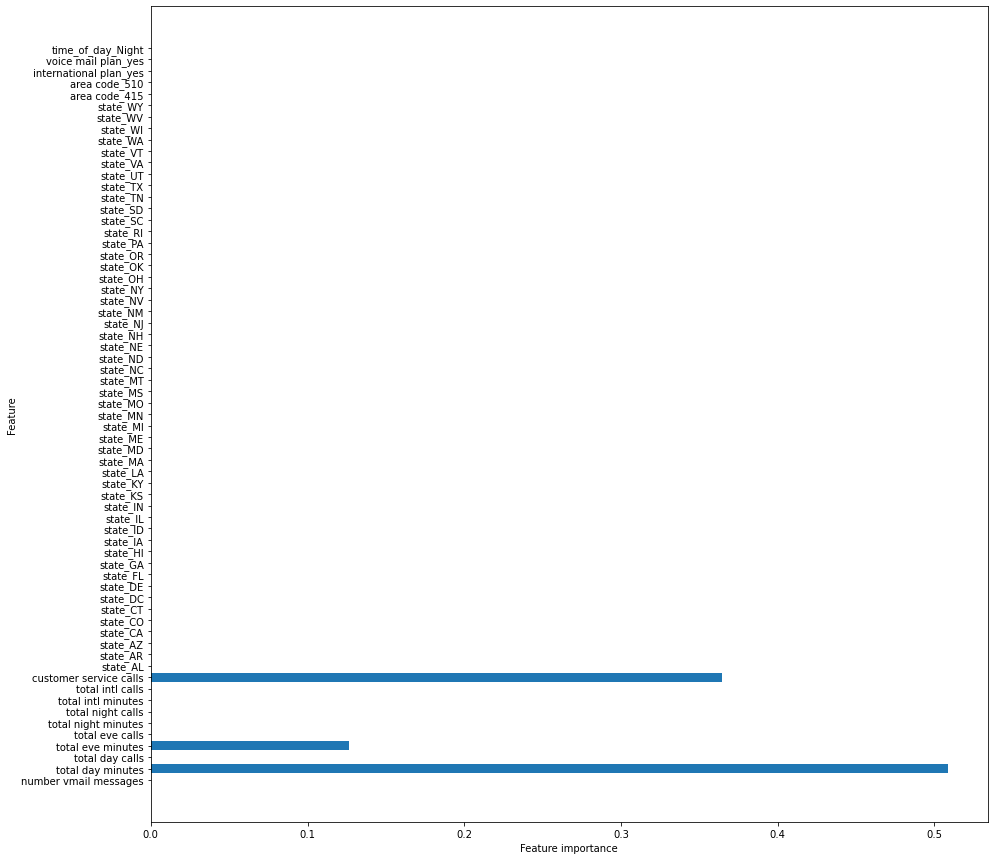

In [54]:
# call plot_feature_importances() on rf_tree_1.
# Feature importance
plot_feature_importances(rf_tree_1)

In [55]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

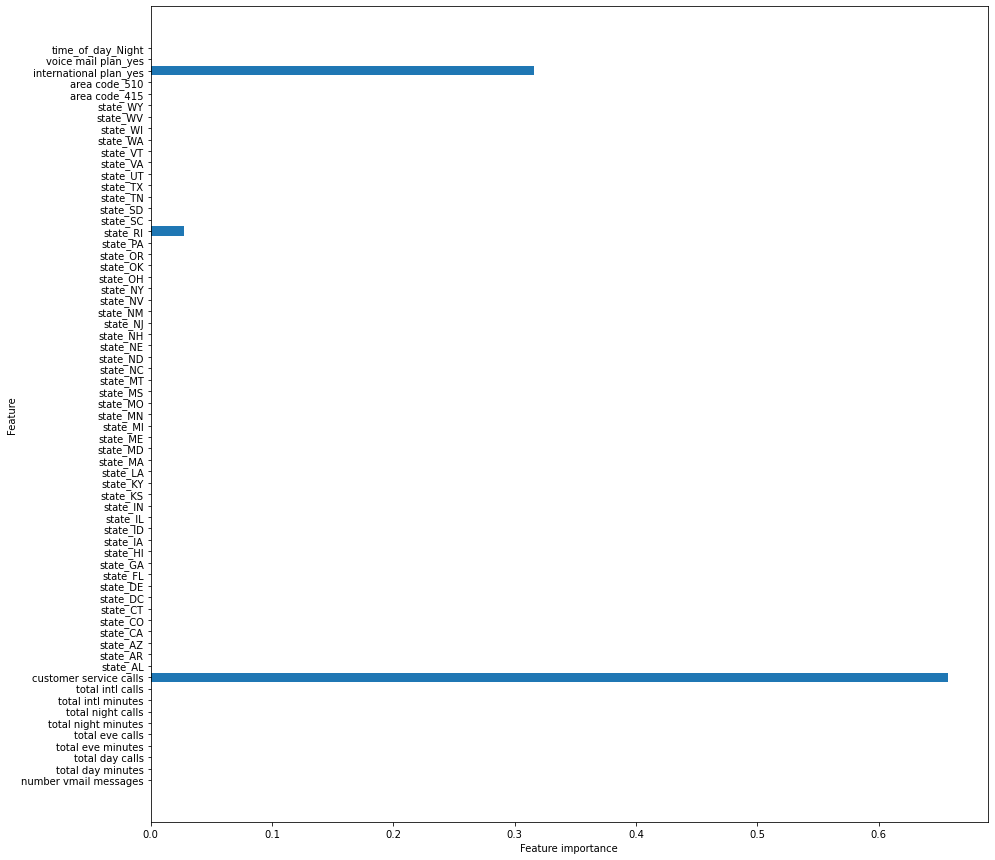

In [56]:
# Feature importance
plot_feature_importances(rf_tree_2)

By comparing two plots we note that there are different attributes had higher importance.

# Model Evaluation.

### 1. Logistic Regression:

Achieved an accuracy of 86%.
Performed well in predicting non-churn cases (class "0") but struggled with churn prediction (class "1").
Adjusting the threshold improved precision but reduced recall for churn cases.

### 2. Decision Tree:

Achieved the highest accuracy at 94.12%.
Demonstrated a high precision and recall for both churn and non-churn cases.
Provided a well-balanced predictive performance and was particularly effective at identifying churn cases.

### 3. Bagged Trees:

Achieved an accuracy of 94.48%.
Demonstrated a strong performance in predicting both churn and non-churn cases, maintaining a good balance of precision and recall.

### 4. Random Forest:

Achieved an accuracy of 86.81%.
Offered feature importance information and flexibility through parameter tuning but didn't outperform the Decision Tree.

### 5. Random Forest (Small Trees):

Created a model with smaller trees, useful for feature selection and model complexity reduction.

I decided to move with Desicion Tree model.

Reasons for Choosing the Decision Tree:

- The Decision Tree model yielded the highest accuracy among all the models, at 94.12%.
- It displayed an excellent balance between precision and recall for both churn and non-churn cases, making it highly effective at identifying customer churn.
- The model's interpretability and ease of understanding its decision-making process are advantageous for gaining insights into the factors influencing churn.
- Decision Trees are relatively lightweight in terms of computational resources and training time compared to some other models, which can be an advantage in real-time or resource-constrained scenarios.

# Business recommendation.

Here are some of the reccommendations for the business.
### 1. Personalized Marketing Campaigns: 

Implement personalized marketing strategies for different customer segments. Use the insights from the model to target at-risk customers with tailored promotions, discounts, or incentives to encourage them to stay.

### 2. Customer Feedback Loop:

Establish a feedback loop to gather insights from churned customers. Understand their reasons for leaving and use this feedback to improve your services or address common pain points.

### 3. Enhance Customer Support: 

Improve the quality and responsiveness of customer support. Ensure that customer issues are resolved quickly and satisfactorily. Utilize the model to identify high-risk customers and prioritize their support needs.

### 4. Product or Service Enhancements: 

Continuously assess and enhance the quality of your products or services. Use the model to identify patterns in customer behavior and preferences, which can guide product development and improvements.

### 5. Subscription Plan Adjustments: 

Consider offering flexible subscription plans or pricing options. Some customers may be churning due to cost concerns or underutilization of certain features. Tailor plans to better match individual customer needs.

### 6. Retention Offers: 

Develop retention offers for customers at high risk of churning. These could include extended trial periods, loyalty rewards, or exclusive access to new features. Make these offers visible to the identified customers.

### 7. Competitor Analysis: 

Keep an eye on competitors and what they are offering. Understand why customers may be switching to competitors and adapt your strategies accordingly.

### 8. Monitor Customer Behavior: 

Continue to monitor customer behavior and adjust your strategies accordingly. The predictive model should be regularly updated with new data to maintain its accuracy.

### 9. Data Security and Privacy: 

Assure customers of data security and privacy. This is particularly important in industries where data security is a concern. Clearly communicate your commitment to safeguarding customer data.